## TC 5033
### Word Embeddings

<br>

#### Activity 3a: Exploring Word Embeddings with GloVe and Numpy
<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project: 
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictionary of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (40%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    
   - Functionality (60%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (10% each for a total of 20%)
       - Similarity function (20%)
       - Analogy function (20%)
|



#### Import libraries

In [1]:
# Import libraries
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle
plt.style.use('ggplot')

#### Load file

In [6]:
emb_dim = 200
PATH = 'glove.6B/glove.6B.'+str(emb_dim)+'d.txt'

In [3]:
# Create dictionary with embeddings
def create_emb_dictionary(path):
    result_dict = {}
    # Open the file in read mode and utf8 encoding so it doesn't fail
    with open(path, "r", encoding="utf8") as f:
        # Loop through each line in the file
        for line in f:
            # Split the line by spaces
            tokens = line.split()            
            # Add the key-value pair to the dictionary
            result_dict[tokens[0]] = np.asarray(tokens[1:], dtype='float32')
    # Return the dictionary
    return result_dict

In [4]:
# create dictionary
embeddings_dict = create_emb_dictionary(PATH)

In [ ]:
# Checking first items
print(list(embeddings_dict.items())[:5])

In [16]:
# Serialize
#with open('embeddings_dict_200D.pkl', 'wb') as f:
#    pickle.dump(embeddings_dict, f)
PKL_PATH = 'embeddings_dict_'+str(emb_dim)+'D.pkl'
# Deserialize
with open(PKL_PATH, 'rb') as f:
     embeddings_dict = pickle.load(f)

#### See some embeddings

In [8]:
# Show some
def show_n_first_words(path, n_words):
        with open(path, 'r') as f:
            for i, line in enumerate(f):
                print(line.split(), len(line.split()[1:]))
                if i>=n_words: break

In [9]:
show_n_first_words(PATH, 5)

['the', '-0.071549', '0.093459', '0.023738', '-0.090339', '0.056123', '0.32547', '-0.39796', '-0.092139', '0.061181', '-0.1895', '0.13061', '0.14349', '0.011479', '0.38158', '0.5403', '-0.14088', '0.24315', '0.23036', '-0.55339', '0.048154', '0.45662', '3.2338', '0.020199', '0.049019', '-0.014132', '0.076017', '-0.11527', '0.2006', '-0.077657', '0.24328', '0.16368', '-0.34118', '-0.06607', '0.10152', '0.038232', '-0.17668', '-0.88153', '-0.33895', '-0.035481', '-0.55095', '-0.016899', '-0.43982', '0.039004', '0.40447', '-0.2588', '0.64594', '0.26641', '0.28009', '-0.024625', '0.63302', '-0.317', '0.10271', '0.30886', '0.097792', '-0.38227', '0.086552', '0.047075', '0.23511', '-0.32127', '-0.28538', '0.1667', '-0.0049707', '-0.62714', '-0.24904', '0.29713', '0.14379', '-0.12325', '-0.058178', '-0.001029', '-0.082126', '0.36935', '-0.00058442', '0.34286', '0.28426', '-0.068599', '0.65747', '-0.029087', '0.16184', '0.073672', '-0.30343', '0.095733', '-0.5286', '-0.22898', '0.064079', '0.0

### Plot some embeddings

In [10]:
def plot_embeddings(emb_path, words2show, emb_dim, embeddings_dict, func = PCA):
    # Load embeddings
    if(len(embeddings_dict) <= 0):
        embeddings_dict = create_emb_dictionary(emb_path)
    # Filter the embeddings of the words to plot
    words2show_embeddings = [value for (key,value) in embeddings_dict.items() if key in words2show]    
    # Reduce dimensions using the function passed
    if func == PCA:
        words2show_reduced = PCA(n_components=2).fit_transform(np.array(words2show_embeddings))
    else:
        words2show_reduced = TSNE(n_components=2, perplexity=30,init='pca', n_iter=2500).fit_transform(np.array(words2show_embeddings))
    # Plot embeddings
    fig, ax = plt.subplots(figsize=(15,10))
    ax.scatter(words2show_reduced[:,0],words2show_reduced[:,1])
    
    for i, word in enumerate(words2show):
        ax.annotate(word, (words2show_reduced[i, 0], words2show_reduced[i, 1]))
    
    #return words2show_embeddings
    

In [11]:
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips', 
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']


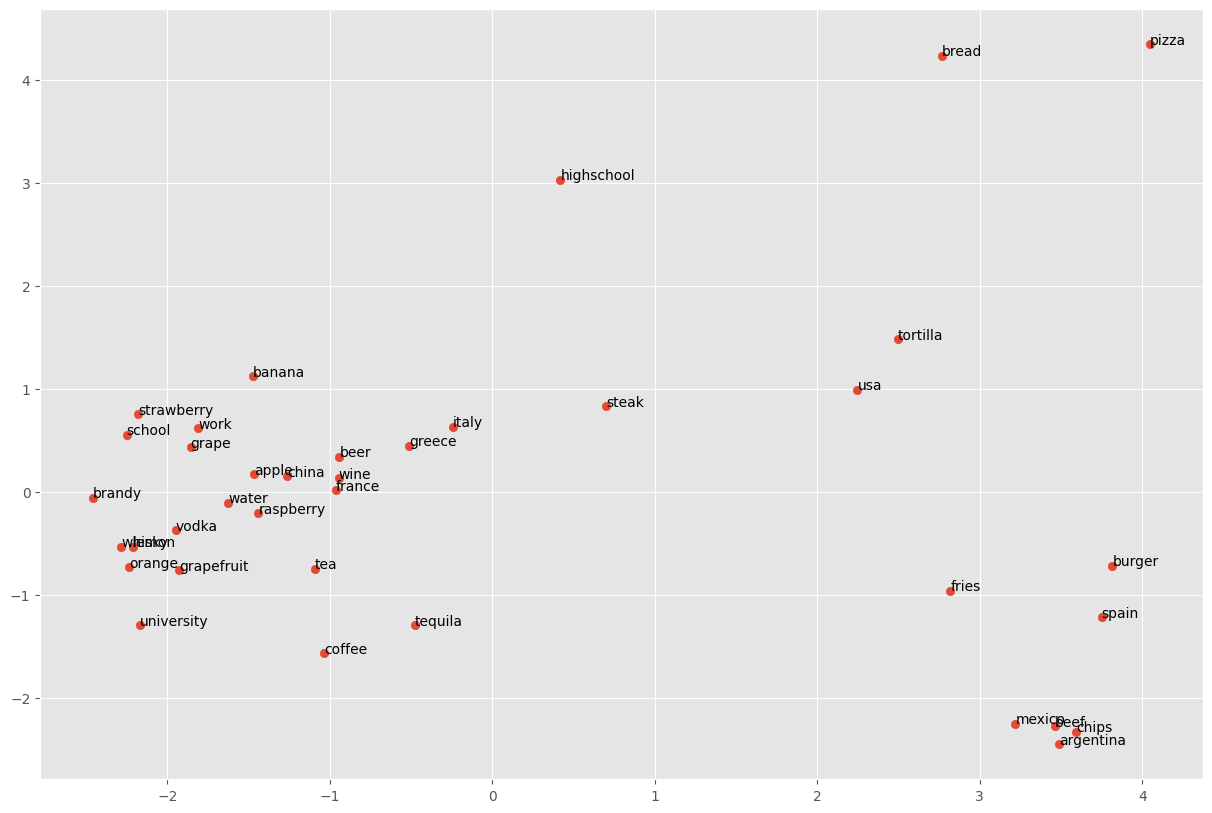

In [12]:
plot_embeddings(PATH, words, emb_dim, embeddings_dict, PCA)

c:\Users\elmer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\elmer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


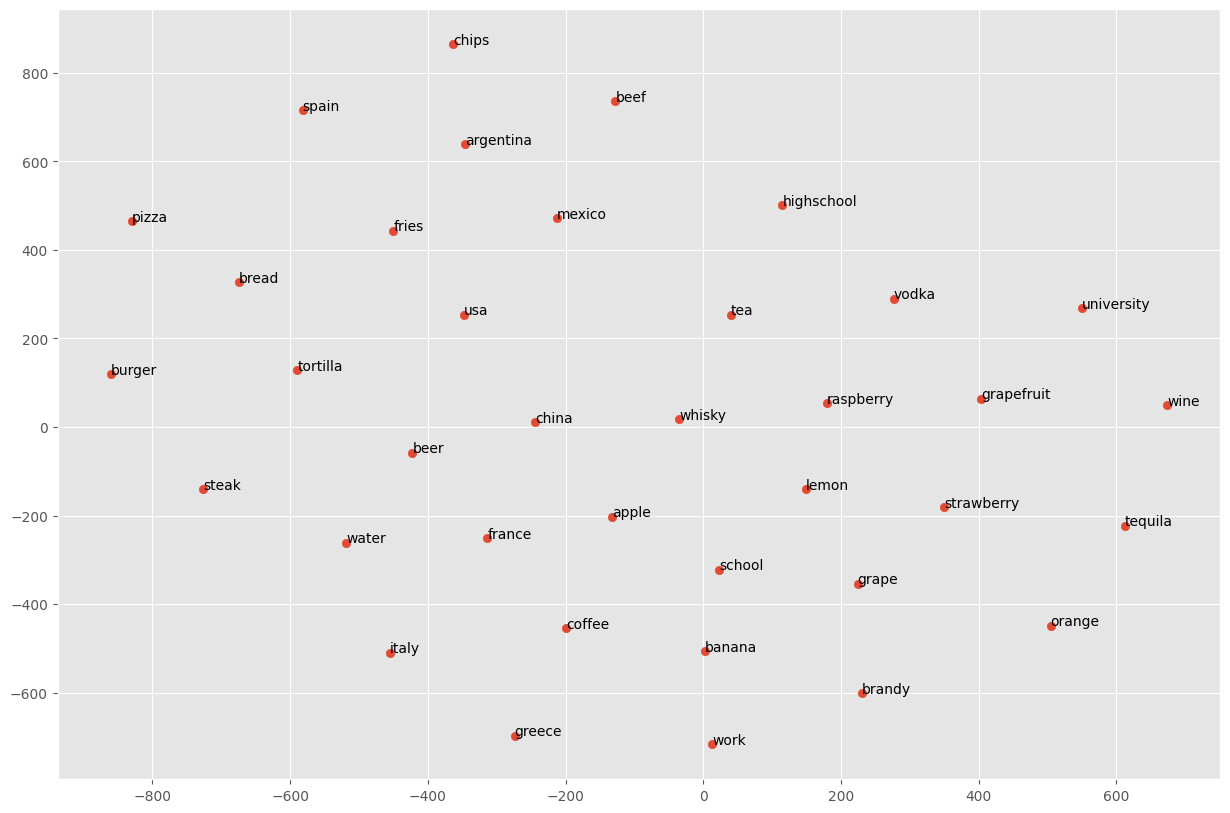

In [17]:
# t-SNE dimensionality reduction for visualization
embeddings = plot_embeddings(PATH, words, emb_dim, embeddings_dict, TSNE)
#TODO review why it's grpahed this way

### Let us compute analogies

In [37]:
def calc_cosine_similarity(A,B):
    return np.dot(A,B)/(norm(A)*norm(B))

# analogy
def analogy(word1, word2, word3, embeddings_dict):
    # Get vector difference between words
    delta = embeddings_dict[word2] - embeddings_dict[word1]
    # Add diference to new vector
    a_vector = embeddings_dict[word3] + delta
    # Calculate similar words using new vector
    analogies = {}
    for word, embeddings in embeddings_dict.items():
        similarity = calc_cosine_similarity(a_vector, embeddings)        
        if similarity > 0.60:
            analogies[word] = similarity
    
    return analogies

In [40]:
analogies = analogy('man', 'king', 'woman', embeddings_dict)
analogies.items()

dict_items([('king', 0.82090676), ('queen', 0.7119165), ('princess', 0.6121214), ('monarch', 0.6024806)])

In [78]:
# most similar
def find_most_similar(word, embeddings_dict, top_n=10):
    most_similar = {}
    for key,embeddings in embeddings_dict.items():
        most_similar[key] = calc_cosine_similarity(embeddings_dict[word],embeddings)
    
    return sorted(most_similar.items(),key=lambda x:x[1], reverse=True)[1:top_n]

In [79]:
most_similar = find_most_similar('mexico', embeddings_dict)

In [80]:
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w[0]}')

1 ---> mexican
2 ---> venezuela
3 ---> colombia
4 ---> peru
5 ---> guatemala
6 ---> argentina
7 ---> brazil
8 ---> chile
9 ---> bolivia
